In [168]:
from matplotlib import pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point
import descartes
import numpy as np
import pyvista as pv

Init points

In [169]:
points = [[125., 98.], [124., 99.], [123., 99.], [122., 99.], [121., 99.], [120., 99.], [119., 99.], [118., 99.],
         [117., 99.], [116., 99.], [115., 99.], [114., 99.], [113., 100.], [112., 100.], [111., 101.],
         [110., 101.], [109., 102.], [108., 103.], [107., 103.], [106., 103.], [105., 104.], [104., 104.],
         [103., 104.], [102., 105.], [102., 106.], [101., 107.], [100., 107.], [99., 108.], [98., 108.],
         [97., 108.], [96., 108.], [95., 109.], [94., 109.], [93., 110.], [92., 111.], [91., 112.], [90., 113.],
         [89., 114.], [88., 115.], [87., 116.], [87., 117.], [87., 118.], [86., 119.], [86., 120.], [86., 121.],
         [85., 122.], [85., 123.], [85., 124.], [86., 124.], [87., 125.], [88., 126.], [89., 127.], [90., 128.],
         [91., 128.], [92., 128.], [93., 128.], [94., 127.], [95., 127.], [96., 127.], [97., 126.], [97., 125.],
         [96., 124.], [95., 123.], [94., 122.], [93., 121.], [93., 120.], [93., 119.], [93., 118.], [93., 117.],
         [93., 116.], [94., 115.], [95., 114.], [95., 113.], [96., 112.], [97., 111.], [98., 110.], [98., 109.],
         [99., 108.], [100., 108.], [101., 107.], [102., 107.], [102., 106.], [103., 105.], [104., 105.],
         [105., 104.], [106., 104.], [107., 104.], [108., 104.], [109., 103.], [110., 103.], [111., 103.],
         [112., 103.], [113., 102.], [114., 102.], [115., 101.], [116., 101.], [117., 101.], [118., 101.],
         [119., 101.], [120., 100.], [121., 100.], [122., 100.], [123., 100.], [124., 100.], [125., 100.],
         [126., 100.], [127., 100.], [128., 100.], [129., 100.], [130., 100.], [131., 100.], [132., 100.],
         [133., 100.], [134., 100.], [135., 100.], [136., 101.], [137., 101.], [138., 101.], [139., 101.],
         [140., 102.], [141., 102.], [142., 103.], [143., 103.], [144., 104.], [145., 105.], [146., 105.],
         [147., 106.], [148., 107.], [149., 108.], [150., 109.], [150., 110.], [150., 111.], [151., 112.],
         [151., 113.], [151., 114.], [151., 115.], [150., 116.], [150., 117.], [149., 118.], [148., 118.],
         [147., 119.], [147., 120.], [146., 121.], [145., 121.], [146., 121.], [147., 121.], [148., 120.],
         [149., 119.], [150., 118.], [151., 119.], [152., 118.], [153., 118.], [153., 117.], [153., 116.],
         [154., 115.], [155., 115.], [155., 114.], [155., 113.], [155., 112.], [155., 111.], [155., 110.],
         [154., 109.], [154., 108.], [153., 107.], [152., 107.], [151., 106.], [150., 105.], [149., 105.],
         [148., 104.], [147., 104.], [146., 104.], [145., 103.], [144., 102.], [143., 101.], [142., 101.],
         [141., 101.], [140., 101.], [139., 100.], [138., 100.], [137., 100.], [136., 100.], [135., 99.],
         [134., 99.], [133., 98.], [132., 98.], [131., 98.], [130., 98.], [129., 98.], [128., 98.], [127., 98.],
         [126., 98.]]


Create Polygon

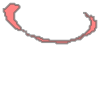

In [170]:
poly = Polygon(points)
poly

Add buffer to polygon (makes them larger, cause the contains method will exclude boundary line)

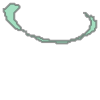

In [171]:
poly_big = poly.buffer(1e-10)
poly_big

Print Poly

In [172]:
poly_coords = list(zip(*poly.exterior.coords.xy))
poly_coords

[(125.0, 98.0),
 (124.0, 99.0),
 (123.0, 99.0),
 (122.0, 99.0),
 (121.0, 99.0),
 (120.0, 99.0),
 (119.0, 99.0),
 (118.0, 99.0),
 (117.0, 99.0),
 (116.0, 99.0),
 (115.0, 99.0),
 (114.0, 99.0),
 (113.0, 100.0),
 (112.0, 100.0),
 (111.0, 101.0),
 (110.0, 101.0),
 (109.0, 102.0),
 (108.0, 103.0),
 (107.0, 103.0),
 (106.0, 103.0),
 (105.0, 104.0),
 (104.0, 104.0),
 (103.0, 104.0),
 (102.0, 105.0),
 (102.0, 106.0),
 (101.0, 107.0),
 (100.0, 107.0),
 (99.0, 108.0),
 (98.0, 108.0),
 (97.0, 108.0),
 (96.0, 108.0),
 (95.0, 109.0),
 (94.0, 109.0),
 (93.0, 110.0),
 (92.0, 111.0),
 (91.0, 112.0),
 (90.0, 113.0),
 (89.0, 114.0),
 (88.0, 115.0),
 (87.0, 116.0),
 (87.0, 117.0),
 (87.0, 118.0),
 (86.0, 119.0),
 (86.0, 120.0),
 (86.0, 121.0),
 (85.0, 122.0),
 (85.0, 123.0),
 (85.0, 124.0),
 (86.0, 124.0),
 (87.0, 125.0),
 (88.0, 126.0),
 (89.0, 127.0),
 (90.0, 128.0),
 (91.0, 128.0),
 (92.0, 128.0),
 (93.0, 128.0),
 (94.0, 127.0),
 (95.0, 127.0),
 (96.0, 127.0),
 (97.0, 126.0),
 (97.0, 125.0),
 (96.0, 1

Print big poly

In [173]:
poly_big_coords = list(zip(*poly_big.exterior.coords.xy))
poly_big_coords

[(125.0, 97.9999999999),
 (124.9999999999902, 97.99999999990048),
 (124.99999999998049, 97.99999999990192),
 (124.99999999997097, 97.9999999999043),
 (124.99999999996173, 97.99999999990762),
 (124.99999999995286, 97.99999999991181),
 (124.99999999994445, 97.99999999991685),
 (124.99999999993656, 97.9999999999227),
 (124.99999999992929, 97.99999999992929),
 (123.99999999995858, 98.9999999999),
 (114.0, 98.9999999999),
 (113.9999999999902, 98.99999999990048),
 (113.99999999998049, 98.99999999990192),
 (113.99999999997097, 98.9999999999043),
 (113.99999999996173, 98.99999999990762),
 (113.99999999995286, 98.99999999991181),
 (113.99999999994445, 98.99999999991685),
 (113.99999999993656, 98.9999999999227),
 (113.99999999992929, 98.99999999992929),
 (112.99999999995858, 99.9999999999),
 (112.0, 99.9999999999),
 (111.9999999999902, 99.99999999990048),
 (111.99999999998049, 99.99999999990192),
 (111.99999999997097, 99.9999999999043),
 (111.99999999996173, 99.99999999990762),
 (111.99999999995

Define grid

In [174]:
nxy = 256
dims = np.array([nxy, nxy, 1])
dims_plus1 = [dims[0] + 1, dims[1] + 1, dims[2]]
grid = pv.UniformGrid(
    dims=dims_plus1,
    spacing=(1, 1, 1),
    origin=(0, 0, 0),
)
points_t = np.transpose(grid.points.T)
points_t

array([[  0.,   0.,   0.],
       [  1.,   0.,   0.],
       [  2.,   0.,   0.],
       ...,
       [254., 256.,   0.],
       [255., 256.,   0.],
       [256., 256.,   0.]])

Find out the point clouds

In [175]:
points_i_only = []
for i, o in enumerate(points_t):
    point = Point(o[:2])
    if poly_big.contains(point):
        points_i_only.append(o)
points_i_only

[array([125.,  98.,   0.]),
 array([126.,  98.,   0.]),
 array([127.,  98.,   0.]),
 array([128.,  98.,   0.]),
 array([129.,  98.,   0.]),
 array([130.,  98.,   0.]),
 array([131.,  98.,   0.]),
 array([132.,  98.,   0.]),
 array([133.,  98.,   0.]),
 array([114.,  99.,   0.]),
 array([115.,  99.,   0.]),
 array([116.,  99.,   0.]),
 array([117.,  99.,   0.]),
 array([118.,  99.,   0.]),
 array([119.,  99.,   0.]),
 array([120.,  99.,   0.]),
 array([121.,  99.,   0.]),
 array([122.,  99.,   0.]),
 array([123.,  99.,   0.]),
 array([124.,  99.,   0.]),
 array([125.,  99.,   0.]),
 array([126.,  99.,   0.]),
 array([127.,  99.,   0.]),
 array([128.,  99.,   0.]),
 array([129.,  99.,   0.]),
 array([130.,  99.,   0.]),
 array([131.,  99.,   0.]),
 array([132.,  99.,   0.]),
 array([133.,  99.,   0.]),
 array([134.,  99.,   0.]),
 array([135.,  99.,   0.]),
 array([112., 100.,   0.]),
 array([113., 100.,   0.]),
 array([114., 100.,   0.]),
 array([115., 100.,   0.]),
 array([116., 100., 

Show the point clouds

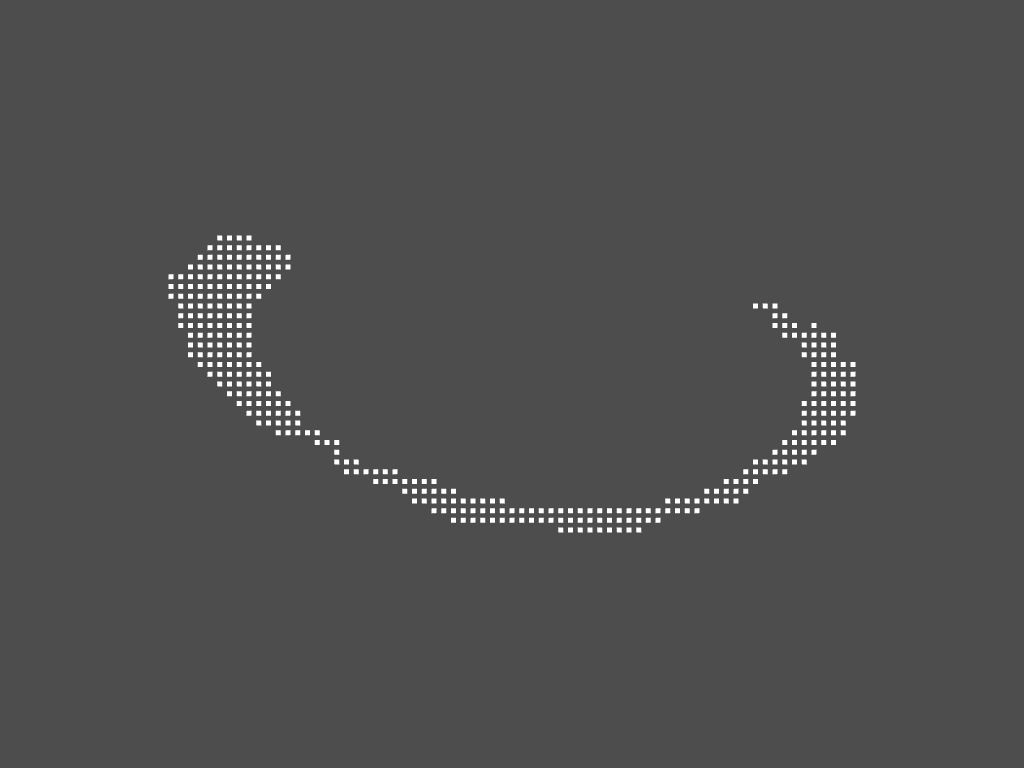

In [176]:
plot = pv.Plotter()
plot.add_points(np.array(points_i_only))
plot.camera_position = 'xy'
plot.show()